# ER131 First Draft Project Template

Fall 2022

## How to use this notebook: 
* Follow the format and sequencing of sections
* Edit the markdown cells to be specific to your project.
* Put the code you use to accomplish the tasks of each section in between each markdown cell.
* Delete this cell before you hand in the notebook
* As with homeworks, you'll hand in a `.ipynb` file and a `.pdf` file; we'll also ask you to make your data available.

## Basic First Draft Requirements 
**Grading**.  You'll see point allocations listed in each of the section titles below.  In addition, there are other categories for points: 
1. (4 points) Build your first dataframe including at least on target variable and a set of features.  In a markdown cell, clearly explain what the target variable is, what each row represents, and what the features are.  Provide a summary of the entries in the dataframe (e.g. using a few plots and `pd.describe`)
2. (4 points) Choose and justify a type of prediction model to train.  (E.g. lasso, or random forests.)
4. (4 points) Generate a test-train split.  Then cross validate the model with the training data to tune at least one hyperparameter.
3. (4 points) Evaluate how well the prediction model performs on test data. 
5. (4 points) For clarity.  Use markdown cells to clearly and concisely explain what you are doing and your justification for your decisions.  Keep your code clean and readable and well commented.  

We are looking for progress and not perfection. In each category we'll score 1 point for completion, 2 points for demonstrating some understanding, 3 points for just a few mistakes, 4 points for demonstrating mastery.

## (delete this markdown cell in your final submission)

# Predicting Outlier Engery Consumption in On-campus Housing using building energy and weather data

In this cell, replace the text above with your project title.  

Then give an alphabetical (by last name) list of student group members.  Beside each student's name, provide an estimate of the number of hours each student put into the effort, anbd a description of each student's contribution to the project.  For example:
* Rachel Ng (2.5 hours): Researched, found and imported different data source. Set up skeleton for project including github repo. Responsible for importing, merging and describing the first dataframe.

* Duncan Callaway (2 hours). developed template including overall workflow, specific tasks, and scoring rubric
* Julia Longmate (1 hours). checked template for clarity and provided suggestions on improvements

If one person did most of the work, or one person did very little work, talk openly about that as a team and make a plan to even the workload going forward.  Contact Duncan or Julia if you are not able to agree on how much work each person did, or to make a plan going forward.

In [14]:
# Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Build your first dataframe (4 points)
Build your first dataframe including at least on target variable and a set of features.  In a markdown cell, clearly explain what the target variable is, what each row represents, and what the features are.  Provide a summary of the entries in the dataframe (e.g. using a few plots and `pd.describe`).

This section should briefly explain where you got your data and what you've done to manipulate it.  The final project will ask for much more information here.

In [8]:
# Import Foothill 4 CSV file
foothill_4 = pd.read_csv('housing_data/Copy of Foothill Building 4 Electric.csv')

In [9]:
# Import weather data from relevant timeframe
import os
directory = 'weather_data'
weather_df = pd.DataFrame()

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)
        data = pd.read_csv(f, skiprows=6)
        weather_df = pd.concat([weather_df, data])

weather_data/LBNL1 (1).csv
weather_data/LBNL1 (2).csv
weather_data/LBNL1 (3).csv
weather_data/LBNL1.csv
weather_data/LBNL1 (4).csv


In [4]:
# Select the response variable and the features chosen in both the foothill df and the weather df
response = ['kW demand (kW)']
foothil_features = ['V1 THD (%)', 'PF sign total', 'kWh del (kWh)', 'I3 THD (%)', 'kW total (kW)', 'I1 THD (%)', 'V2 THD (%)', 'V3 THD (%)', 'I2 THD (%)', 'time (US/Pacific)', 'Frequency (Hz)']
weather_features = ['pressure_set_1', 'air_temp_set_1', 'relative_humidity_set_1', 'wind_speed_set_1', 'precip_accum_fifteen_minute_set_1', 'solar_radiation_set_1', 'Date_Time']



In [6]:
# Since we need to merge the data based on the time stamp, we need to convert the time column to be consisent across the 2 df's
foothill_clean = foothill_4[foothil_features + response]
foothill_clean['time (US/Pacific)'] = pd.to_datetime(foothill_clean['time (US/Pacific)'])
foothill_clean['time (US/Pacific)'] = foothill_clean['time (US/Pacific)'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

weather_clean = weather_df[weather_features]
weather_clean['Date_Time'] = pd.to_datetime(weather_clean['Date_Time'])
weather_clean['Date_Time'] = weather_clean['Date_Time'].dt.tz_convert('US/Pacific')

/var/folders/84/qs1c51m52817x9dg38d92zb00000gn/T/ipykernel_3650/241377050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothill_clean['time (US/Pacific)'] = pd.to_datetime(foothill_clean['time (US/Pacific)'])
/var/folders/84/qs1c51m52817x9dg38d92zb00000gn/T/ipykernel_3650/241377050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothill_clean['time (US/Pacific)'] = foothill_clean['time (US/Pacific)'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
/var/folders/84/qs1c51m52817x9dg38d92zb00000gn

In [7]:
merged_df = weather_clean.merge(foothill_clean, right_on='time (US/Pacific)', left_on='Date_Time')
merged_df.dropna(inplace=True)

In [11]:
# Understanding the response variable
merged_df['kW demand (kW)'].describe()

count    173036.000000
mean         88.131325
std          29.532303
min           0.000000
25%          66.000000
50%          76.000000
75%         108.000000
max         206.000000
Name: kW demand (kW), dtype: float64

Text(0.5, 1.0, 'Distribution of Response variable kW demand (kW)')

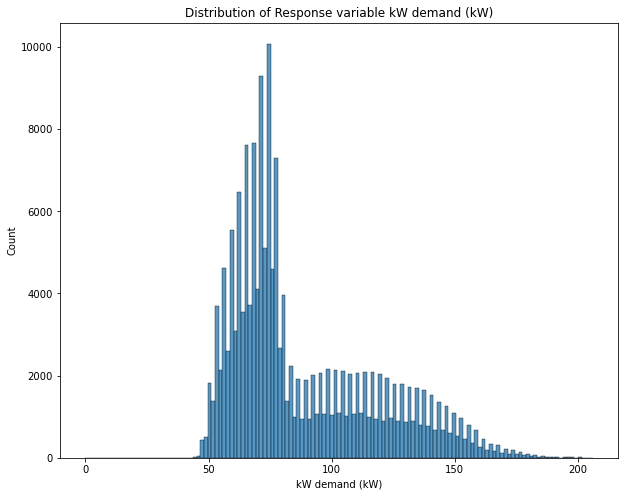

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data=merged_df, x="kW demand (kW)")
plt.title('Distribution of Response variable kW demand (kW)')

From this distribution plot, we can see how the kW demand (kW) is spread. For example, the mode appears to be around 80kW. In the context of this project, this could mean that values that differ from this mode has the potential to be an outlier.

#### Investigating the correlation between variables using a pairplot
The seaborn pairplot function allows us to quickly generate scatter plots between all combinations of features and responses. For example, it appears that the V1 THD, V2 THD and V3 THD feature variables have a linear relationship with one another. 
The diagonal axis of the plot also showcases the distribution of the variable. Investigating this further, we can see that kWh Del has a pretty flat distribution, with value ranging from 5-8 evenly spaced. 

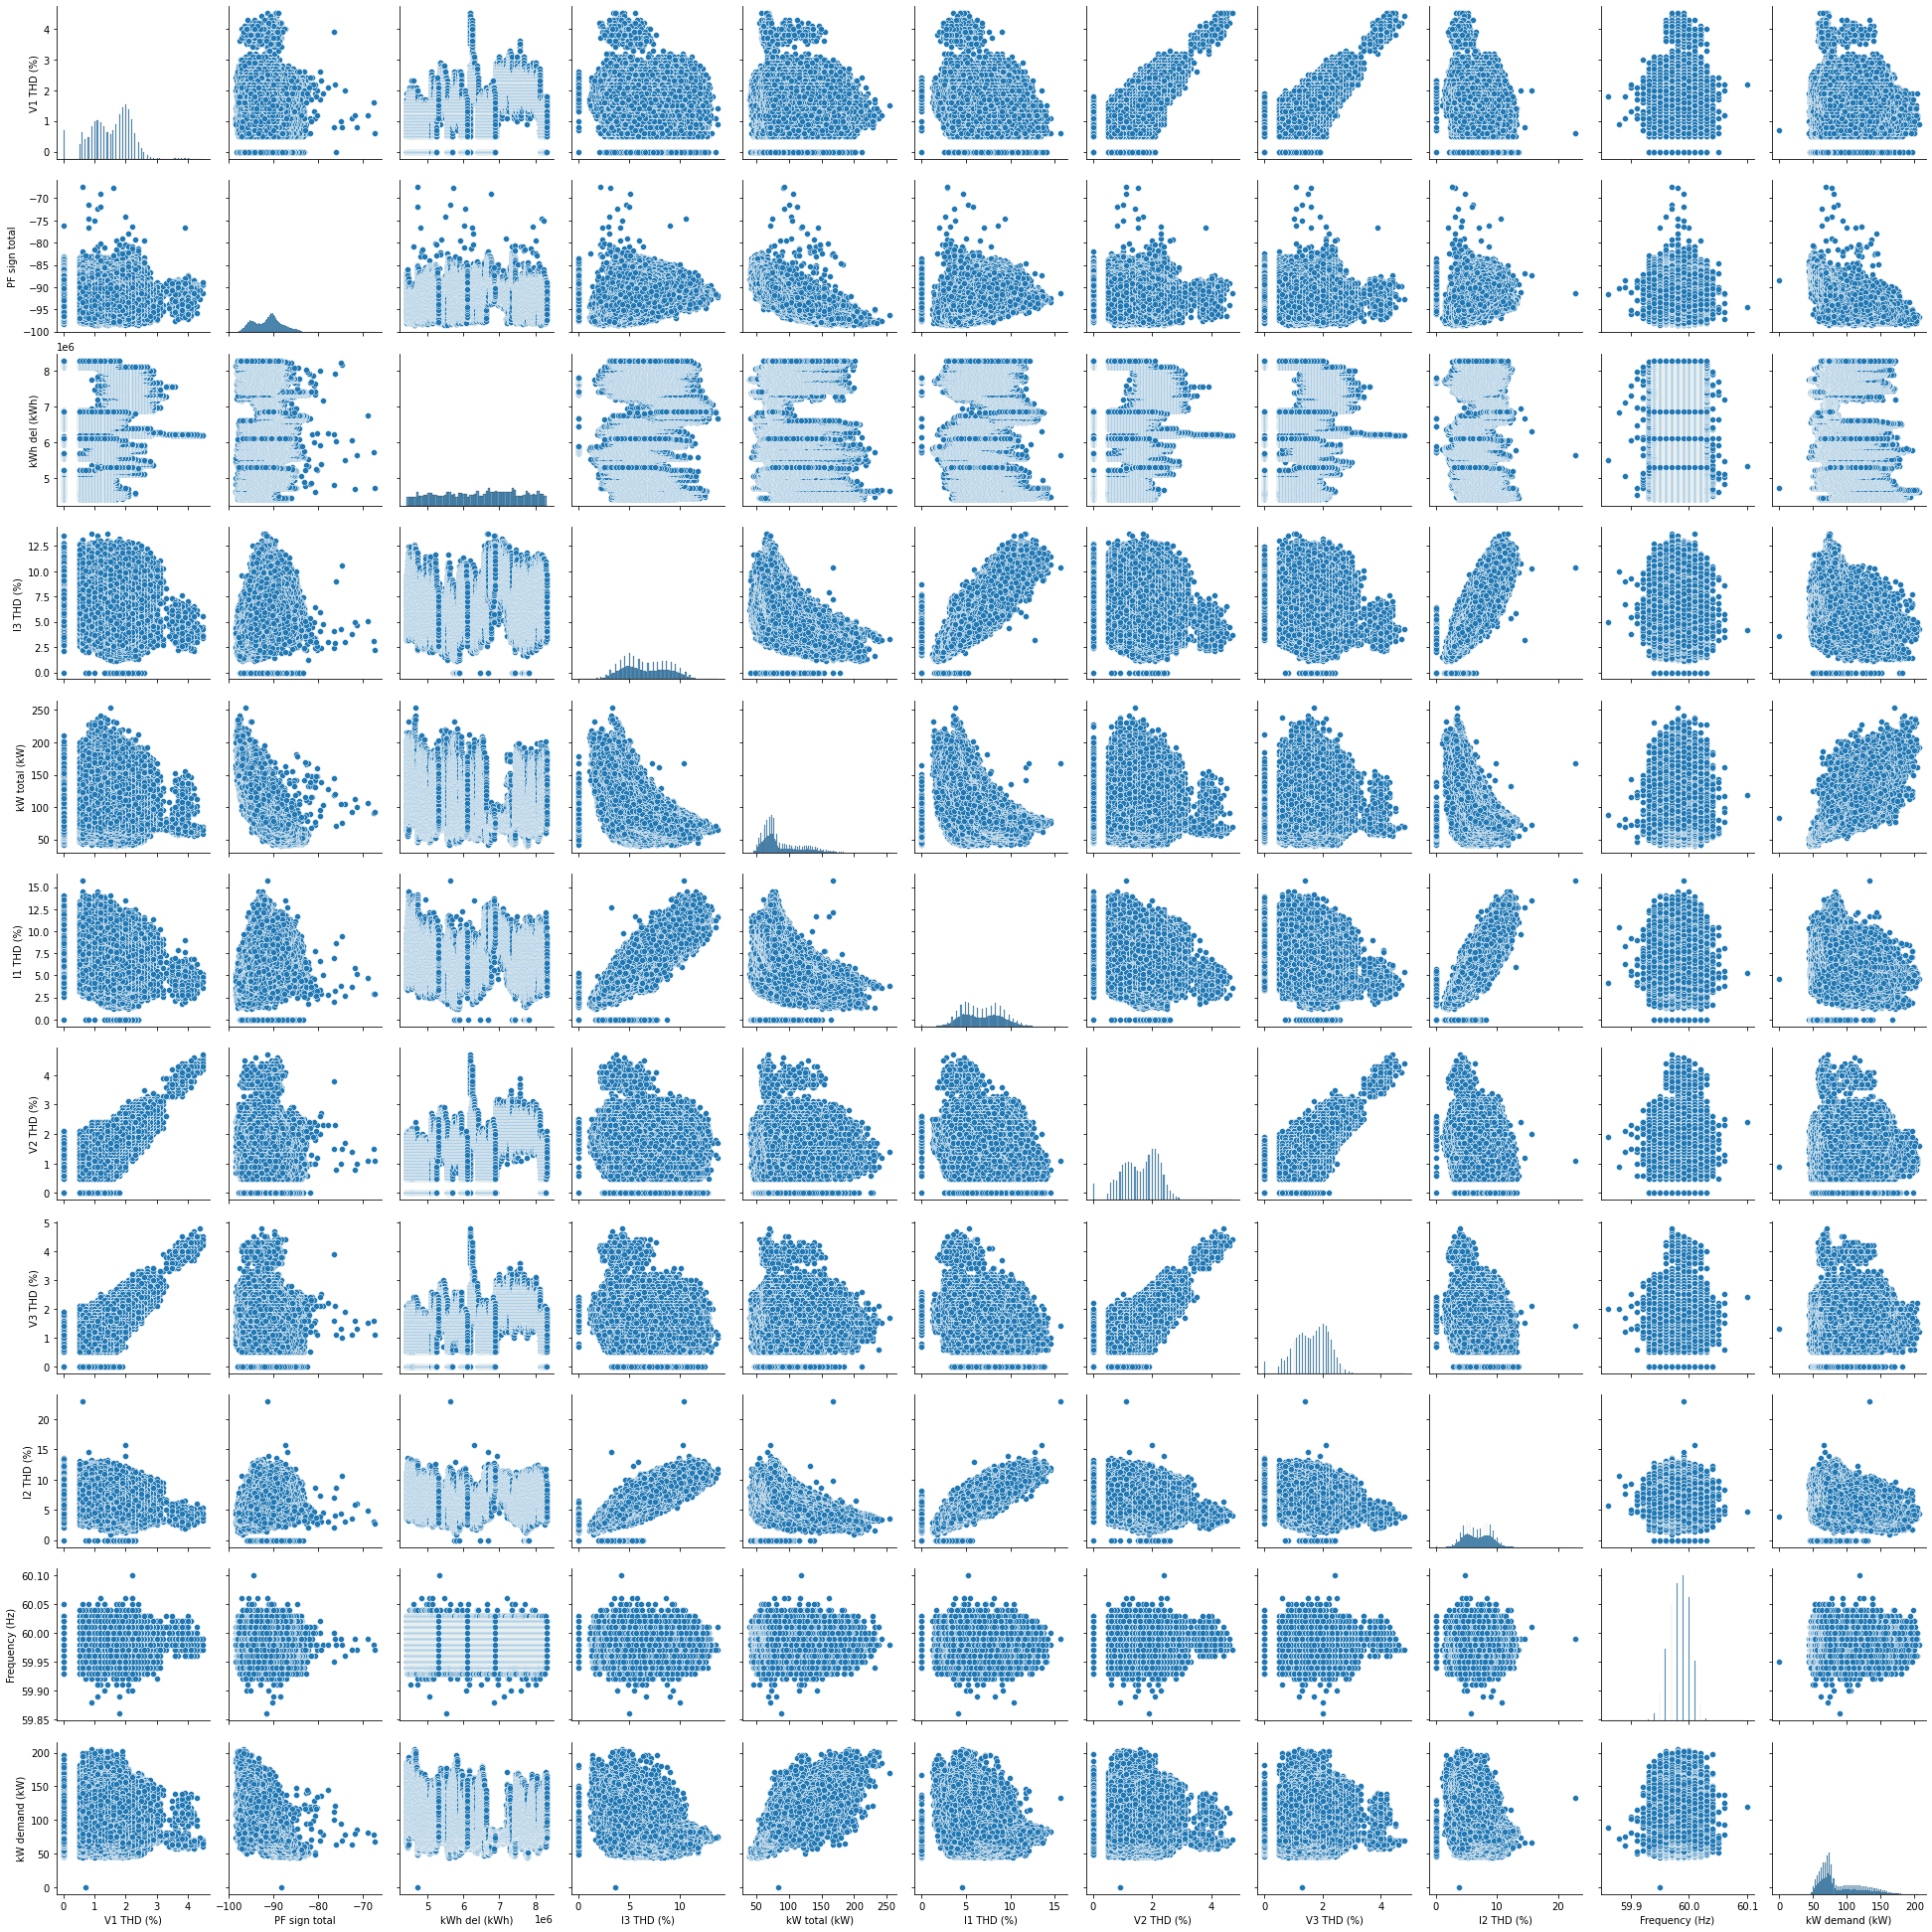

In [18]:
sns.pairplot(merged_df)

## Prediction model (4 points)
Choose and justify a prediction model for this application.  This section can be short, but well-reasoned!

## Training and cross validation (4 points)
Generate a test-train split.  Then train and cross validate your model with the training data to tune at least one hyperparameter.

## Evaluation and next steps (4 points)
Evaluate how well the prediction model performs on test data.  Rationalize the metric(s) you use to measure performance.  Be critical of your work!  It's ok if the model performs poorly. Talk about next steps.   

## Clarity (4 points)
This cell is here to make sure you don't forget.  You can delete it before you hand in your assignment.  

Use markdown cells to clearly and concisely explain what you are doing and your justification for your decisions.  Keep your code clean and readable and well commented.  